# STORM database and intensity exceedance

This notebook involves importing STORM synthetic database in a CLIMADA environment.

In [9]:
from climada.hazard import TCTracks, TropCyclone, Centroids
from datetime import datetime
import pandas as pd
from climada.entity import Exposures
import numpy as np
from dateutil.relativedelta import relativedelta
from climada.util.plot import plot_from_gdf
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl

We want to see the situations for all of the energy sectors. To pilot the pipeline, we use 'coal' as the focal example first.

In [ ]:
plt.rcParams['font.family'] = 'cmr10'
plt.rcParams['font.size'] = 12
mpl.rcParams['axes.unicode_minus'] = False

In [11]:
tracks_sync_1000yr = TCTracks.from_simulations_storm('data/STORM_DATA_HadGEM3-GC31-HM_NI_1000_YEARS_0_IBTRACSDELTA.txt')
years = [int(tr.attrs['id_no'] / 1000) for tr in tracks_sync_1000yr.data]
return_periods = [5,10,25,50,100,200,500,1000]

In [12]:
extent_india = [68.7, 97.3, 7, 38]

In [13]:
def ordinal_to_date(ordinal_array):
    return [datetime.fromordinal(int(d)) for d in ordinal_array]

We first import the asset locations.

In [14]:
def rp_graphs(file):
    exposures_coal = pd.read_excel(file)
    exp = Exposures(exposures_coal, ref_year=2024)
    lat = exposures_coal["latitude"].values
    lon = exposures_coal["longitude"].values
    centrs = Centroids.from_lat_lon(lat, lon)
    storm = TropCyclone.from_tracks(tracks_sync_1000yr, centroids=centrs, store_windfields=True)
    original_tcdate = storm.date
    tc_date = storm.date
    ordinal_dates = storm.date
    normal_dates = ordinal_to_date(ordinal_dates)
    adjusted_dates = [dt + relativedelta(years=yr) for dt, yr in zip(normal_dates, years)]
    final_dates = [dt.toordinal() for dt in adjusted_dates]
    storm.date = np.array(final_dates)
    storm.frequency_from_tracks(tracks_sync_1000yr.data)
    storm.frequency=np.array([0.001]*1797)
    local_exceedance_impacts, title, column_label = storm.local_exceedance_intensity(return_periods=return_periods, method='extrapolate_constant')
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8), subplot_kw={'projection': ccrs.PlateCarree()})

    axes = axes.flatten()

    for i, ax in enumerate(axes):
        local_exceedance_impacts, title, column_label = storm.local_exceedance_intensity(return_periods=[return_periods[i]], method='extrapolate_constant')
        plot_from_gdf(local_exceedance_impacts, title, column_label, axis=ax, figsize=None, smooth=True)
        ax.set_extent(extent_india, crs=ccrs.PlateCarree())

    plt.tight_layout()
    plt.show()

Coal

C:\Users\Admin\AppData\Local\Temp\ipykernel_18204\4232605049.py:6: DeprecatedWarning: from_lat_lon is deprecated. This method will be removed in a future version. Simply use the constructor instead.
  centrs = Centroids.from_lat_lon(lat, lon)
c:\users\admin\desktop\climada\climada_python\climada\util\interpolation.py:214: RuntimeWarning: divide by zero encountered in log10
  fill_value = (y_train[0], np.log10(y_asymptotic) if logy else y_asymptotic)
c:\users\admin\desktop\climada\climada_python\climada\util\interpolation.py:214: RuntimeWarning: divide by zero encountered in log10
  fill_value = (y_train[0], np.log10(y_asymptotic) if logy else y_asymptotic)
c:\users\admin\desktop\climada\climada_python\climada\util\interpolation.py:214: RuntimeWarning: divide by zero encountered in log10
  fill_value = (y_train[0], np.log10(y_asymptotic) if logy else y_asymptotic)
c:\users\admin\desktop\climada\climada_python\climada\util\interpolation.py:214: RuntimeWarning: divide by zero encountered 

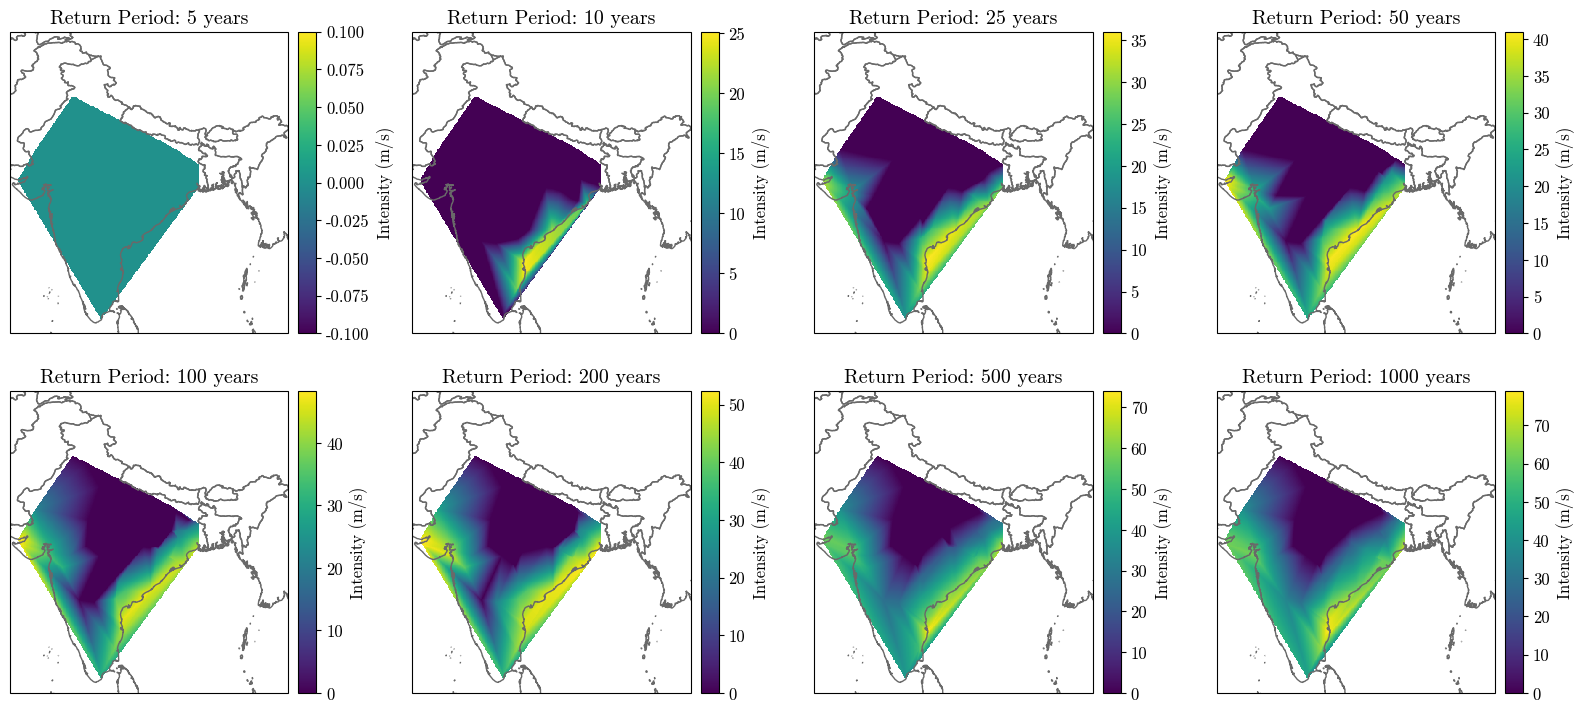

In [15]:
rp_graphs('exposures/exposures_coal.xlsx')

Bio

C:\Users\Admin\AppData\Local\Temp\ipykernel_18204\4232605049.py:6: DeprecatedWarning: from_lat_lon is deprecated. This method will be removed in a future version. Simply use the constructor instead.
  centrs = Centroids.from_lat_lon(lat, lon)
c:\users\admin\desktop\climada\climada_python\climada\util\interpolation.py:214: RuntimeWarning: divide by zero encountered in log10
  fill_value = (y_train[0], np.log10(y_asymptotic) if logy else y_asymptotic)
c:\users\admin\desktop\climada\climada_python\climada\util\interpolation.py:214: RuntimeWarning: divide by zero encountered in log10
  fill_value = (y_train[0], np.log10(y_asymptotic) if logy else y_asymptotic)
c:\users\admin\desktop\climada\climada_python\climada\util\interpolation.py:214: RuntimeWarning: divide by zero encountered in log10
  fill_value = (y_train[0], np.log10(y_asymptotic) if logy else y_asymptotic)
c:\users\admin\desktop\climada\climada_python\climada\util\interpolation.py:214: RuntimeWarning: divide by zero encountered 

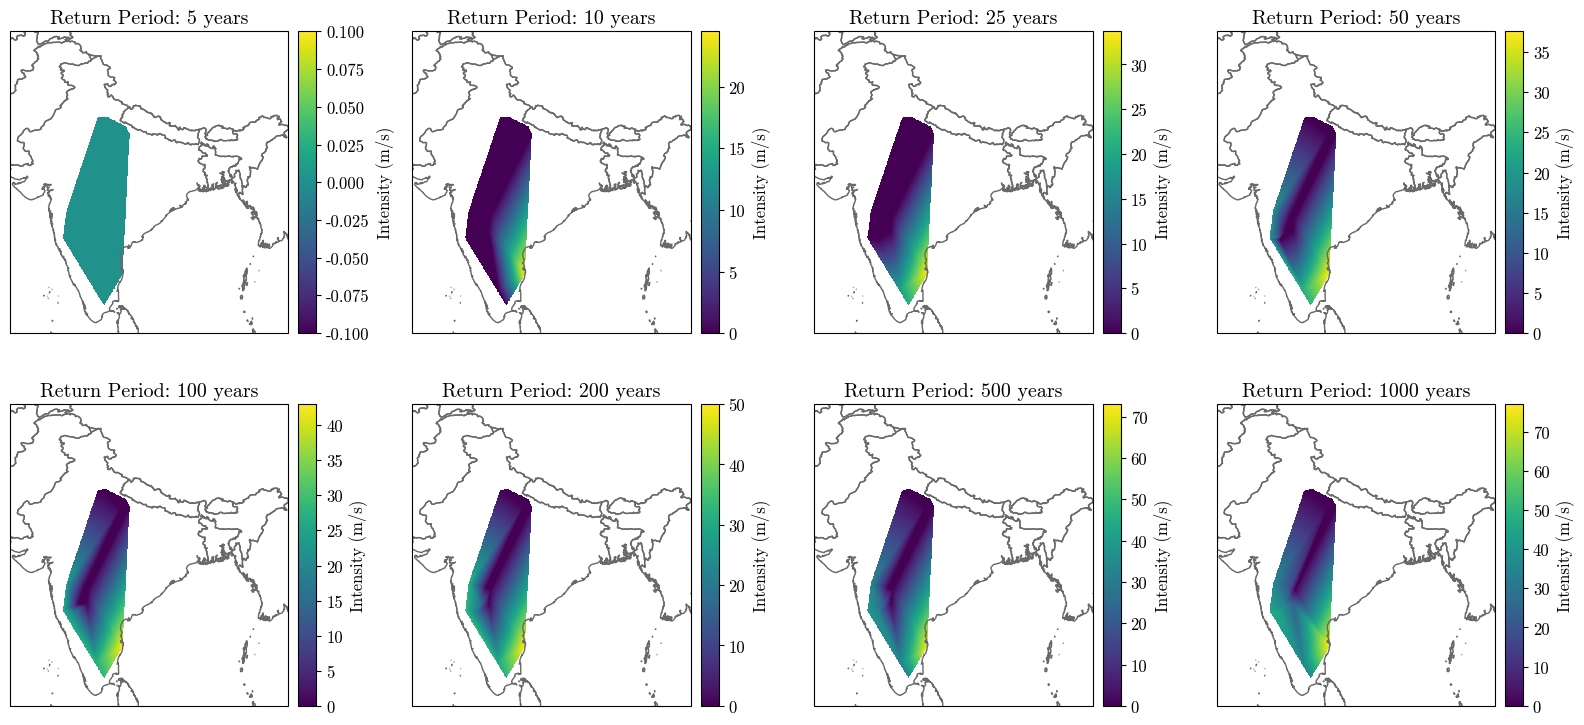

In [16]:
rp_graphs('exposures/exposures_bioenergy.xlsx')

Nuclear

C:\Users\Admin\AppData\Local\Temp\ipykernel_18204\4232605049.py:6: DeprecatedWarning: from_lat_lon is deprecated. This method will be removed in a future version. Simply use the constructor instead.
  centrs = Centroids.from_lat_lon(lat, lon)
c:\users\admin\desktop\climada\climada_python\climada\util\interpolation.py:214: RuntimeWarning: divide by zero encountered in log10
  fill_value = (y_train[0], np.log10(y_asymptotic) if logy else y_asymptotic)
c:\users\admin\desktop\climada\climada_python\climada\util\interpolation.py:214: RuntimeWarning: divide by zero encountered in log10
  fill_value = (y_train[0], np.log10(y_asymptotic) if logy else y_asymptotic)
c:\users\admin\desktop\climada\climada_python\climada\util\interpolation.py:214: RuntimeWarning: divide by zero encountered in log10
  fill_value = (y_train[0], np.log10(y_asymptotic) if logy else y_asymptotic)
c:\users\admin\desktop\climada\climada_python\climada\util\interpolation.py:214: RuntimeWarning: divide by zero encountered 

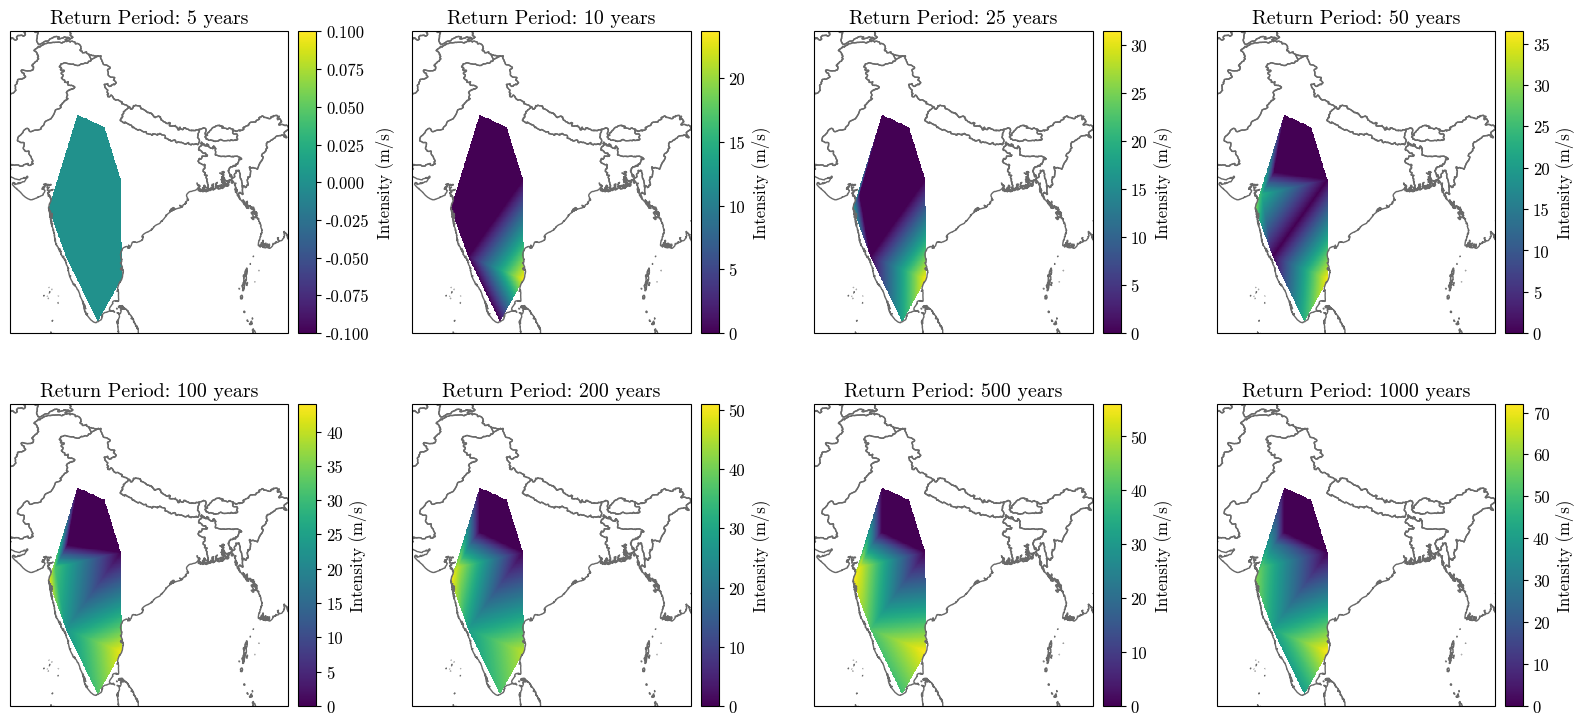

In [17]:
rp_graphs('exposures/exposures_nuclear.xlsx')

Oil & gas

C:\Users\Admin\AppData\Local\Temp\ipykernel_18204\4232605049.py:6: DeprecatedWarning: from_lat_lon is deprecated. This method will be removed in a future version. Simply use the constructor instead.
  centrs = Centroids.from_lat_lon(lat, lon)
c:\users\admin\desktop\climada\climada_python\climada\util\interpolation.py:214: RuntimeWarning: divide by zero encountered in log10
  fill_value = (y_train[0], np.log10(y_asymptotic) if logy else y_asymptotic)
c:\users\admin\desktop\climada\climada_python\climada\util\interpolation.py:214: RuntimeWarning: divide by zero encountered in log10
  fill_value = (y_train[0], np.log10(y_asymptotic) if logy else y_asymptotic)
c:\users\admin\desktop\climada\climada_python\climada\util\interpolation.py:214: RuntimeWarning: divide by zero encountered in log10
  fill_value = (y_train[0], np.log10(y_asymptotic) if logy else y_asymptotic)
c:\users\admin\desktop\climada\climada_python\climada\util\interpolation.py:214: RuntimeWarning: divide by zero encountered 

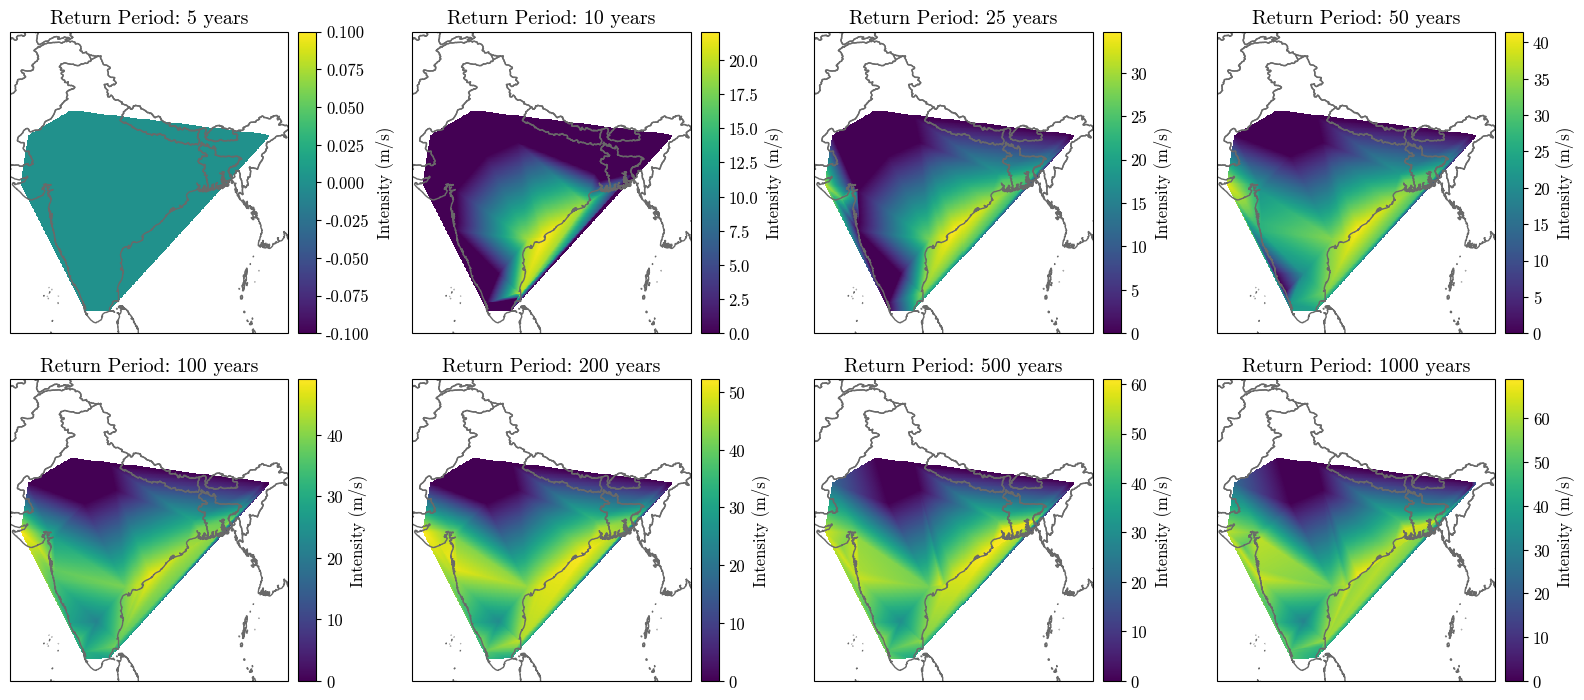

In [18]:
rp_graphs('exposures/exposures_oilgas.xlsx')

In [ ]:
def exceedance_curve_generator(exposure_file):
    exposures = pd.read_excel(exposure_file)
    asset_lat = exposures["latitude"].values
    asset_lon = exposures["longitude"].values
    centorids = Centroids.from_lat_lon(asset_lat, asset_lon)
    storm = TropCyclone.from_tracks(tracks_sync_1000yr, centroids=centorids, store_windfields=True)
    normal_dates = ordinal_to_date(storm.date)
    adjusted_dates = [dt + relativedelta(years=yr) for dt, yr in zip(normal_dates, years)]
    final_dates = [dt.toordinal() for dt in adjusted_dates]
    storm.date = np.array(final_dates)
    storm.frequency_from_tracks(tracks_sync_1000yr.data)
    storm.frequency=np.array([0.001]*1797)
    local_exceedance_impacts, title, column_label = storm.local_exceedance_intensity(return_periods=[5, 10, 25, 50, 100, 200, 500, 1000], method='extrapolate_constant')
    df = pd.DataFrame(local_exceedance_impacts.drop(columns=['geometry']))
    df.to_excel('exceedence'+exposure_file[18:-5]+'_new.xlsx', index=False)

Coal

In [24]:
exceedance_curve_generator('exposures/exposure_coal.xlsx')

C:\Users\Admin\AppData\Local\Temp\ipykernel_27440\933073879.py:5: DeprecatedWarning: from_lat_lon is deprecated. This method will be removed in a future version. Simply use the constructor instead.
  centorids = Centroids.from_lat_lon(asset_lat, asset_lon)
c:\users\admin\desktop\climada\climada_python\climada\util\interpolation.py:214: RuntimeWarning: divide by zero encountered in log10
  fill_value = (y_train[0], np.log10(y_asymptotic) if logy else y_asymptotic)


Bio

In [25]:
exceedance_curve_generator('exposures/exposure_bioenergy.xlsx')

C:\Users\Admin\AppData\Local\Temp\ipykernel_27440\933073879.py:5: DeprecatedWarning: from_lat_lon is deprecated. This method will be removed in a future version. Simply use the constructor instead.
  centorids = Centroids.from_lat_lon(asset_lat, asset_lon)
c:\users\admin\desktop\climada\climada_python\climada\util\interpolation.py:214: RuntimeWarning: divide by zero encountered in log10
  fill_value = (y_train[0], np.log10(y_asymptotic) if logy else y_asymptotic)


OilGas

In [26]:
exceedance_curve_generator('exposures/exposure_oilgas.xlsx')

C:\Users\Admin\AppData\Local\Temp\ipykernel_27440\933073879.py:5: DeprecatedWarning: from_lat_lon is deprecated. This method will be removed in a future version. Simply use the constructor instead.
  centorids = Centroids.from_lat_lon(asset_lat, asset_lon)
c:\users\admin\desktop\climada\climada_python\climada\util\interpolation.py:214: RuntimeWarning: divide by zero encountered in log10
  fill_value = (y_train[0], np.log10(y_asymptotic) if logy else y_asymptotic)


Nuclear

In [27]:
exceedance_curve_generator('exposures/exposure_nuclear.xlsx')

C:\Users\Admin\AppData\Local\Temp\ipykernel_27440\933073879.py:5: DeprecatedWarning: from_lat_lon is deprecated. This method will be removed in a future version. Simply use the constructor instead.
  centorids = Centroids.from_lat_lon(asset_lat, asset_lon)
c:\users\admin\desktop\climada\climada_python\climada\util\interpolation.py:214: RuntimeWarning: divide by zero encountered in log10
  fill_value = (y_train[0], np.log10(y_asymptotic) if logy else y_asymptotic)
